5.31661129692


带宽： 0.1 0.531661129692 聚类簇的个数为： 7


带宽： 0.2 1.06332225938 聚类簇的个数为： 4


带宽： 0.3 1.59498338907 聚类簇的个数为： 3
带宽： 0.4 2.12664451877 聚类簇的个数为： 1


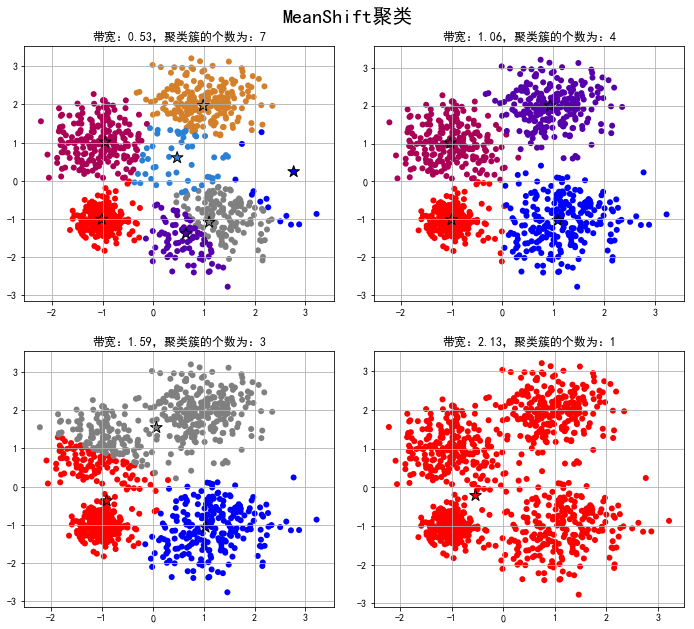

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import MeanShift
from sklearn.metrics import euclidean_distances

N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 9), facecolor='w')
m = euclidean_distances(data, squared=True)
bw = np.median(m)
print(bw)
for i, mul in enumerate(np.linspace(0.1, 0.4, 4)):
    band_width = mul * bw
    model = MeanShift(bin_seeding=True, bandwidth=band_width)
    ms = model.fit(data)
    centers = ms.cluster_centers_
    y_hat = ms.labels_
    n_clusters = np.unique(y_hat).size
    print('带宽：', mul, band_width, '聚类簇的个数为：', n_clusters)

    plt.subplot(2, 2, i+1)
    plt.title(u'带宽：%.2f，聚类簇的个数为：%d' % (band_width, n_clusters))
    clrs = []
    for c in np.linspace(16711680, 255, n_clusters):
        clrs.append("#{:06X}".format(int(c), 2))
    # clrs = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    # print(clrs)
    for k, clr in enumerate(clrs):
        cur = (y_hat == k)
        plt.scatter(data[cur, 0], data[cur, 1], c=clr, edgecolors='none')
    plt.scatter(centers[:, 0], centers[:, 1], s=150, c=clrs, marker='*', edgecolors='k')
    plt.grid(True)
plt.tight_layout(2)
plt.suptitle(u'MeanShift聚类', fontsize=20)
plt.subplots_adjust(top=0.92)
plt.show()